In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # make plots prettier
import os
import matplotlib.gridspec as gridspec
import glob
from scipy.ndimage import gaussian_filter
import colorcet as cc

def set_plotting_style():
    """
    Formats plotting enviroment to that used in Physical Biology of the Cell,ss
    2nd edition. To format all plots within a script, simply execute
    `mwc_induction_utils.set_plotting_style() in the preamble.
    """
    rc = {'lines.linewidth': 2,
          'axes.labelsize': 10,
          'axes.titlesize': 9,
          'axes.facecolor': '#E3DCD0',
          'xtick.labelsize': 7,
          'ytick.labelsize': 7,
          # 'font.family': 'Lucida Sans Unicode',
          'grid.linestyle': '-',
          'grid.linewidth': 0.5,
          'grid.color': '#ffffff',
          'legend.fontsize': 12}
    plt.rc('text.latex', preamble=r'\usepackage{sfmath}')
    plt.rc('xtick.major', pad=-1)
    plt.rc('ytick.major', pad=-1)
    plt.rc('mathtext', fontset='stixsans', sf='sansserif')
    plt.rc('figure', figsize=[4.0, 3.0])
    plt.rc('svg', fonttype='none')
    plt.rc('legend', title_fontsize='16', frameon=True, 
           facecolor='#E3DCD0', framealpha=1)
    sns.set_style('darkgrid', rc=rc)
    sns.set_palette("colorblind", color_codes=True)
    sns.set_context('notebook', rc=rc)

set_plotting_style()



def plot_velocity(dfs, labels, filename=None, max_frame=None, x_limits=None, y_limits=None):
    """
    dfs : list of pd.DataFrame
        A list of DataFrames each containing at least the columns 'time_min' and 'v (m/s)'.
    labels : list of str
        A list of string labels for the plots. Should be the same length as dfs.
    filename : str, optional
        The name of the file where the plot will be saved. If None, the plot will be shown using plt.show().
    max_frame : int, optional
        The maximum frame (row number) to plot.
    x_limits : tuple of (float, float), optional
        The limits for the x-axis.
    y_limits : tuple of (float, float), optional
        The limits for the y-axis.
    """
    if len(dfs) != len(labels):
        raise ValueError("Number of dataframes and labels must be the same")
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    for df, label in zip(dfs, labels):
        df = df.iloc[:max_frame,:]
        
        # Choose a color
        color = next(plt.gca()._get_lines.prop_cycler)['color']
        
        ax.plot(df['time_min'], df['v (m/s)'] * 1e6, label=label, color=color)
        ax.fill_between(df['time_min'], df['v (m/s)'] * 1e6, color=color, alpha=0.2)
    
    ax.set_xlabel('time (min)')
    ax.set_ylabel('Velocity (µm/s)')
    ax.set_title('Velocity vs time, K401-Biotin in TXTL')
    ax.legend()
    
    # Set axis limits if provided
    if x_limits:
        ax.set_xlim(x_limits)
    if y_limits:
        ax.set_ylim(y_limits)
    
    if filename:
        plt.savefig(filename, format='jpg', dpi=150)
    else:
        plt.show()
    
    plt.close(fig)



    
def plot_distance(dfs, labels, filename=None, max_frame=None, x_limits=None, y_limits=None):
    if len(dfs) != len(labels):
        raise ValueError("Number of dataframes and labels must be the same")
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    for df, label in zip(dfs, labels):
        df = df.iloc[:max_frame,:]
        color = next(plt.gca()._get_lines.prop_cycler)['color']
        ax.plot(df['time_min'].iloc[-1], df['distance (m)'].iloc[-1] * 1e6, 'o', label=label, markersize=16, color=color)
    
    ax.set_xlabel('time (min)')
    ax.set_ylabel('Distance (µm)')
    ax.set_title('Displacement vs time, K401-Biotin in TXTL')
    ax.legend()
    
    if x_limits:
        ax.set_xlim(x_limits)
    if y_limits:
        ax.set_ylim(y_limits)
    
    if filename:
        plt.savefig(filename, format='jpg', dpi=150)
    else:
        plt.show()
    
    plt.close(fig)




def plot_power(dfs, labels, filename=None, max_frame=None, x_limits=None, y_limits=None):
    if len(dfs) != len(labels):
        raise ValueError("Number of dataframes and labels must be the same")
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    for df, label in zip(dfs, labels):
        df = df.iloc[:max_frame,:]
        color = next(plt.gca()._get_lines.prop_cycler)['color']
        ax.plot(df['time_min'], df['Power (W)'], label=label, color=color)
        ax.fill_between(df['time_min'], df['Power (W)'], alpha=0.2, color=color)
    
    ax.set_xlabel('time (min)')
    ax.set_ylabel('Power (W)')
    ax.set_title('Power vs time, K401-Biotin in TXTL')
    ax.legend()
    
    if x_limits:
        ax.set_xlim(x_limits)
    if y_limits:
        ax.set_ylim(y_limits)
    
    if filename:
        plt.savefig(filename, format='jpg', dpi=150)
    else:
        plt.show()
    
    plt.close(fig)

    


def plot_vorticity(dfs, labels, filename=None, max_frame=None, x_limits=None, y_limits=None):
    if len(dfs) != len(labels):
        raise ValueError("Number of dataframes and labels must be the same")
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    for df, label in zip(dfs, labels):
        df = df.iloc[:max_frame,:]
        color = next(plt.gca()._get_lines.prop_cycler)['color']
        ax.plot(df['time_min'], df['vorticity (1/s)'], label=label, color=color)
        ax.fill_between(df['time_min'], df['vorticity (1/s)'], alpha=0.2, color=color)
    
    ax.set_xlabel('time (min)')
    ax.set_ylabel('Vorticity (1/s)')
    ax.set_title('Vorticity vs time, K401-Biotin in TXTL')
    ax.legend()
    
    if x_limits:
        ax.set_xlim(x_limits)
    if y_limits:
        ax.set_ylim(y_limits)
    
    if filename:
        plt.savefig(filename, format='jpg', dpi=150)
    else:
        plt.show()
    
    plt.close(fig)

    

    
def plot_divergence(dfs, labels, filename=None, max_frame=None, x_limits=None, y_limits=None):
    if len(dfs) != len(labels):
        raise ValueError("Number of dataframes and labels must be the same")
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    for df, label in zip(dfs, labels):
        df = df.iloc[:max_frame,:]
        color = next(plt.gca()._get_lines.prop_cycler)['color']
        ax.plot(df['time_min'], df['divergence (1/s)'], label=label, color=color)
        ax.fill_between(df['time_min'], df['divergence (1/s)'], alpha=0.2, color=color)
    
    ax.set_xlabel('time (min)')
    ax.set_ylabel('Divergence (1/s)')
    ax.set_title('Divergence vs time, K401-Biotin in TXTL')
    ax.legend()
    
    if x_limits:
        ax.set_xlim(x_limits)
    if y_limits:
        ax.set_ylim(y_limits)
    
    if filename:
        plt.savefig(filename, format='jpg', dpi=150)
    else:
        plt.show()
    
    plt.close(fig)


In [107]:
def process_piv_data(link, µl, vmax=True, time_int=3, L=100, sigma=5, skip_frames=0, remove_end_frames=0):
    """
    Processes PIV data from a series of text files and calculates various physical quantities.
    
    Parameters:
    link (str): The path to the text files containing the data.
    µl (float): The volume in microliters used in calculations.
    vmax (bool): Whether to use the average of the top 10 velocities or the mean velocity.
    time_int (int): The time interval between measurements, used to calculate time in minutes.
    L (int): The correlation length, used in calculations.
    sigma (float): The standard deviation of the Gaussian kernel, used in the Gaussian filter.
    skip_frames (int): The number of initial frames to skip.
    remove_end_frames (int): The number of final frames to remove.
    
    Returns:
    pd.DataFrame: A DataFrame containing time, velocities, vorticities, divergences, distance, 
                  power, work, drag force, and cumulative drag force.
    """
    
    # Get sorted list of text files, skip the initial frames and remove the end frames as specified
    files = sorted(glob.glob(link))[skip_frames:-remove_end_frames or None]
    
    # Initialize lists to store extracted magnitudes
    velocities, vorticities, divergences = [], [], []
       
    for file in files:
        df = pd.read_csv(file, skiprows=2).fillna(0)
        
        # Determine method to calculate velocity
        if vmax:
            v = df['magnitude [m/s]'].nlargest(50).mean()
        else:
            v = df['magnitude [m/s]'].mean()
        
        velocities.append(v)
        vorticities.append(df["vorticity [1/s]"].mean())
        divergences.append(df["divergence [1/s]"].mean())

    
    # Create a DataFrame with time and processed velocities
    result_df = pd.DataFrame(velocities, columns=["v (m/s)"]).reset_index()
    result_df['time_min'] = result_df['index'] * time_int / 60
    result_df['v (m/s)'] = gaussian_filter(result_df['v (m/s)'] - result_df['v (m/s)'].min(), sigma=sigma)
    
    # Calculate additional physical quantities
    result_df['vorticity (1/s)'], result_df['divergence (1/s)'] = vorticities, divergences
    result_df['distance (m)'] = (result_df['v (m/s)'] * result_df['time_min'].diff()).cumsum()
    
    vol, µ, corr = µl * 1E-9, 1E-3, L * 1E-6  # Convert units for volume, viscosity, and correlation length
    result_df["Power (W)"] = vol * µ * (result_df["v (m/s)"] / corr) ** 2
    result_df['Work (J)'] = (result_df["Power (W)"] * result_df['time_min'].diff()).cumsum()
    
    r = 10e-6  # Radius of the bead in meters
    result_df['F_drag (N)'] = 6 * np.pi * µ * r * result_df['v (m/s)']
    result_df['F'] = (result_df["F_drag (N)"] * result_df['time_min'].diff()).cumsum()
    
    return result_df.iloc[:, 1:]

Control

In [108]:
# files = sorted(glob.glob("../../data/piv/Kif3-ActiveDROPS-Nutrients-Three_drop_sizes/Control/2ul_drop/txt-piv-2ul_control/PIVlab_****.txt"))
# files = sorted(glob.glob("../../data/piv/Kif3-ActiveDROPS-Nutrients-Three_drop_sizes/Control/2ul_drop/txt-piv-2ul_control/PIVlab_****.txt"))


In [109]:
control_1 = "../../data/piv/Kif3-ActiveDROPS-Nutrients-Three_drop_sizes/Control/1ul_drop/txt-piv-1ul_control/PIVlab_****.txt"
control_2 = "../../data/piv/Kif3-ActiveDROPS-Nutrients-Three_drop_sizes/Control/2ul_drop/txt-piv-2ul_control/PIVlab_****.txt"
control_3 = "../../data/piv/Kif3-ActiveDROPS-Nutrients-Three_drop_sizes/Control/3ul_drop/txt-piv-3ul_control/PIVlab_****.txt"

control_1 = process_piv_data(control_1, µl=1)
control_2 = process_piv_data(control_2, µl=2)
control_3 = process_piv_data(control_3, µl=3)

In [110]:
control_3

,v (m/s),time_min,vorticity (1/s),divergence (1/s),distance (m),Power (W),Work (J),F_drag (N),F
0,2.246509e-07,0.00,0.000185,0.000017,NaN,1.514041e-17,NaN,4.234570e-14,NaN
1,2.217896e-07,0.05,0.000165,0.000015,1.108948e-08,1.475718e-17,7.378592e-19,4.180635e-14,2.090318e-15
2,2.162422e-07,0.10,0.000149,0.000015,2.190159e-08,1.402820e-17,1.439269e-18,4.076069e-14,4.128352e-15
3,2.083433e-07,0.15,0.000138,0.000003,3.231875e-08,1.302208e-17,2.090373e-18,3.927179e-14,6.091941e-15
4,1.985486e-07,0.20,0.000127,0.000022,4.224618e-08,1.182646e-17,2.681696e-18,3.742552e-14,7.963217e-15
...,...,...,...,...,...,...,...,...,...
594,1.443623e-07,29.70,-0.000004,-0.000004,7.614959e-05,6.252143e-18,1.543101e-13,2.721166e-14,1.435386e-11
595,1.425310e-07,29.75,-0.000008,-0.000027,7.615672e-05,6.094522e-18,1.543104e-13,2.686645e-14,1.435520e-11
596,1.411647e-07,29.80,-0.000015,-0.000001,7.616378e-05,5.978240e-18,1.543107e-13,2.660892e-14,1.435653e-11
597,1.402578e-07,29.85,-0.000016,-0.000011,7.617079e-05,5.901672e-18,1.543110e-13,2.643797e-14,1.435786e-11


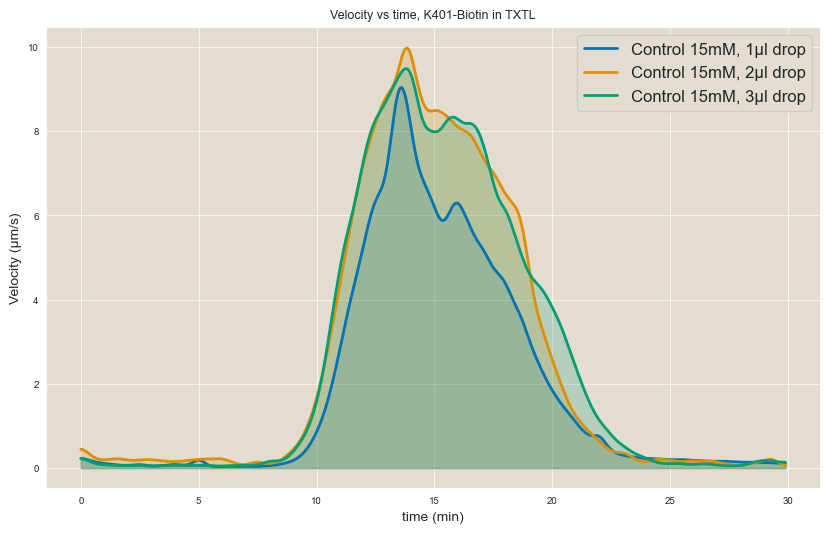

In [111]:
plot_velocity([control_1, control_2, control_3], ['Control 15mM, 1µl drop', 'Control 15mM, 2µl drop', 'Control 15mM, 3µl drop'])#, x_limits=(-0.5,26), y_limits=(-0.025,0.7))


Glucose

In [112]:
glucose_1 = "../../data/piv/Kif3-ActiveDROPS-Nutrients-Three_drop_sizes/Glucose/1ul_drop/txt-piv-1ul-glucose/PIVlab_****.txt"
glucose_2 = "../../data/piv/Kif3-ActiveDROPS-Nutrients-Three_drop_sizes/Glucose/2ul_drop/txt-piv-2ul_glucose/PIVlab_****.txt"
glucose_3 = "../../data/piv/Kif3-ActiveDROPS-Nutrients-Three_drop_sizes/Glucose/3ul_drop/txt-piv-3ul-glucose/PIVlab_****.txt"

glucose_1 = process_piv_data(glucose_1, µl=1)
glucose_2 = process_piv_data(glucose_2, µl=2)
glucose_3 = process_piv_data(glucose_3, µl=3)

In [113]:
glucose_3

,v (m/s),time_min,vorticity (1/s),divergence (1/s),distance (m),Power (W),Work (J),F_drag (N),F
0,2.123292e-06,0.00,0.000621,0.000002,NaN,1.352510e-15,NaN,4.002311e-13,NaN
1,2.101438e-06,0.05,0.000625,0.000042,1.050719e-07,1.324812e-15,6.624062e-17,3.961117e-13,1.980559e-14
2,2.059052e-06,0.10,0.000514,0.000022,2.080245e-07,1.271908e-15,1.298360e-16,3.881221e-13,3.921169e-14
3,1.998603e-06,0.15,0.000496,-0.000011,3.079546e-07,1.198324e-15,1.897522e-16,3.767278e-13,5.804808e-14
4,1.923408e-06,0.20,0.000457,-0.000002,4.041250e-07,1.109849e-15,2.452447e-16,3.625539e-13,7.617577e-14
...,...,...,...,...,...,...,...,...,...
1717,3.181457e-08,85.85,0.000005,-0.000011,1.160265e-04,3.036501e-19,1.969903e-13,5.996906e-15,2.187049e-11
1718,2.981864e-08,85.90,0.000002,-0.000009,1.160280e-04,2.667454e-19,1.969903e-13,5.620681e-15,2.187077e-11
1719,2.821105e-08,85.95,-0.000001,-0.000001,1.160294e-04,2.387590e-19,1.969903e-13,5.317657e-15,2.187103e-11
1720,2.708385e-08,86.00,-0.000002,-0.000008,1.160308e-04,2.200604e-19,1.969904e-13,5.105185e-15,2.187129e-11


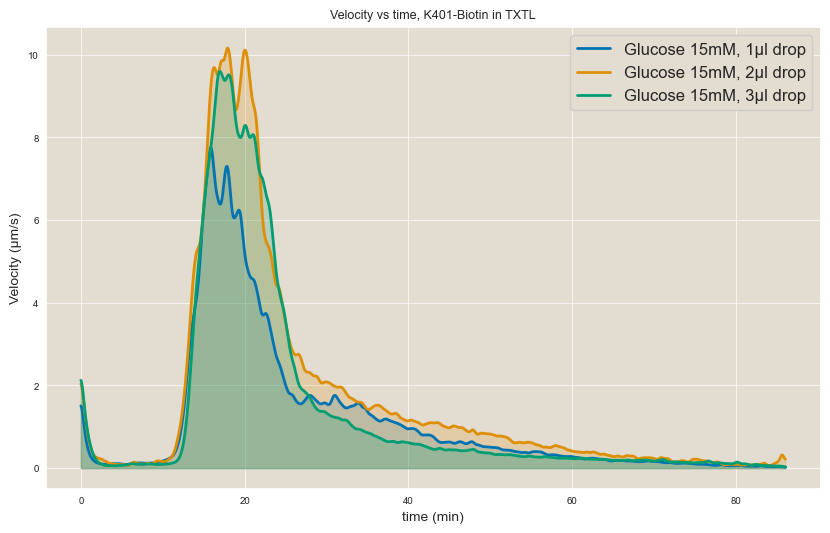

In [114]:
plot_velocity([glucose_1, glucose_2, glucose_3], ['Glucose 15mM, 1µl drop', 'Glucose 15mM, 2µl drop', 'Glucose 15mM, 3µl drop'])#, x_limits=(-0.5,26), y_limits=(-0.025,0.7))


G6P

In [116]:

# G6P_1 = "../../data/piv/Kif3-ActiveDROPS-Nutrients-Three_drop_sizes/G6P/1ul_drop/"
G6P_2 = "../../data/piv/Kif3-ActiveDROPS-Nutrients-Three_drop_sizes/G6P/2ul_drop/txt-piv-2ul-g6p/PIVlab_****.txt"
# G6P_3 = "../../data/piv/Kif3-ActiveDROPS-Nutrients-Three_drop_sizes/G6P/3ul_drop/PIVlab_****.txt"

# G6P_1 = process_piv_data(G6P_1, µl=1)
G6P_2 = process_piv_data(G6P_2, µl=2)
# G6P_3 = process_piv_data(G6P_3, µl=3)

ATP

In [117]:

# atp_1 = "../../data/piv/Kif3-ActiveDROPS-Nutrients-Three_drop_sizes/ATP3p5mM/1ul_drop//PIVlab_****.txt"
atp_2 = "../../data/piv/Kif3-ActiveDROPS-Nutrients-Three_drop_sizes/ATP3p5mM/2ul_drop/txt-piv-2ul_ATP3p5mM/PIVlab_****.txt"
# atp_3 = "../../data/piv/Kif3-ActiveDROPS-Nutrients-Three_drop_sizes/ATP3p5mM/3ul_drop/txt-piv-3ul_control/PIVlab_****.txt"

# atp_1 = process_piv_data(atp_1, µl=1)
atp_2 = process_piv_data(atp_2, µl=2)
# atp_3 = process_piv_data(atp_3, µl=3)


PEP

In [118]:

PEP_1 = "../../data/piv/Kif3-ActiveDROPS-Nutrients-Three_drop_sizes/PEP/1ul_drop/txt-piv-1ul_PEP/PIVlab_****.txt"
PEP_2 = "../../data/piv/Kif3-ActiveDROPS-Nutrients-Three_drop_sizes/PEP/2ul_drop/txt-piv-2ul_pep/PIVlab_****.txt"
PEP_3 = "../../data/piv/Kif3-ActiveDROPS-Nutrients-Three_drop_sizes/PEP/3ul_drop/txt-piv-3ul_PEP/PIVlab_****.txt"

PEP_1 = process_piv_data(PEP_1, µl=1)
PEP_2 = process_piv_data(PEP_2, µl=2)
PEP_3 = process_piv_data(PEP_3, µl=3)

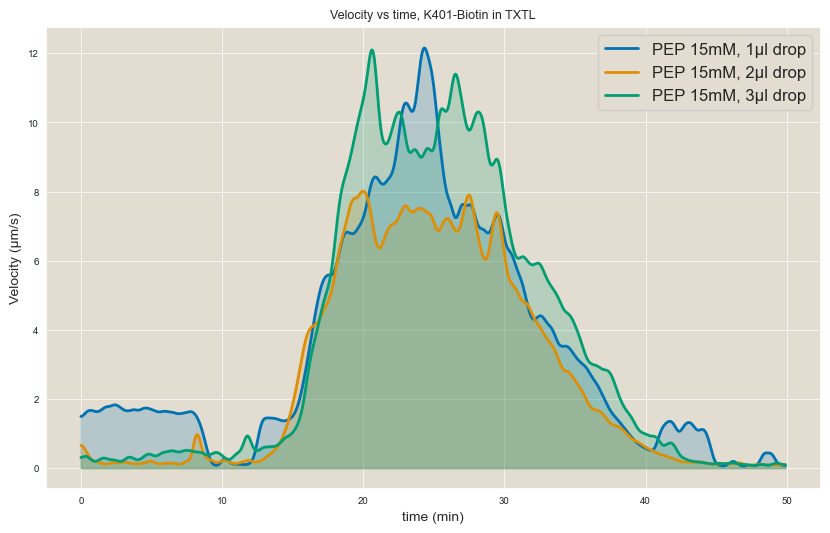

In [119]:
plot_velocity([PEP_1, PEP_2, PEP_3], ['PEP 15mM, 1µl drop', 'PEP 15mM, 2µl drop', 'PEP 15mM, 3µl drop'])#, x_limits=(-0.5,26), y_limits=(-0.025,0.7))


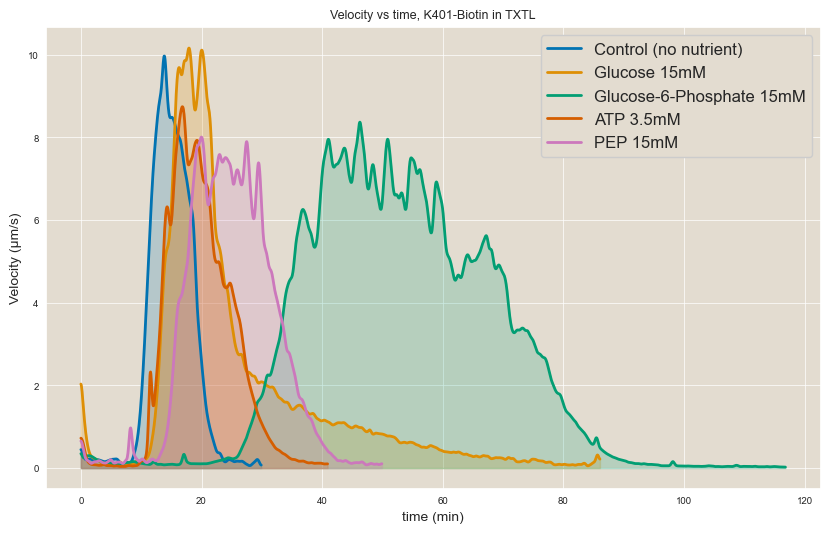

In [128]:
plot_velocity([control_2, glucose_2, G6P_2, atp_2, PEP_2], ["Control (no nutrient)", "Glucose 15mM", "Glucose-6-Phosphate 15mM", "ATP 3.5mM", "PEP 15mM"])

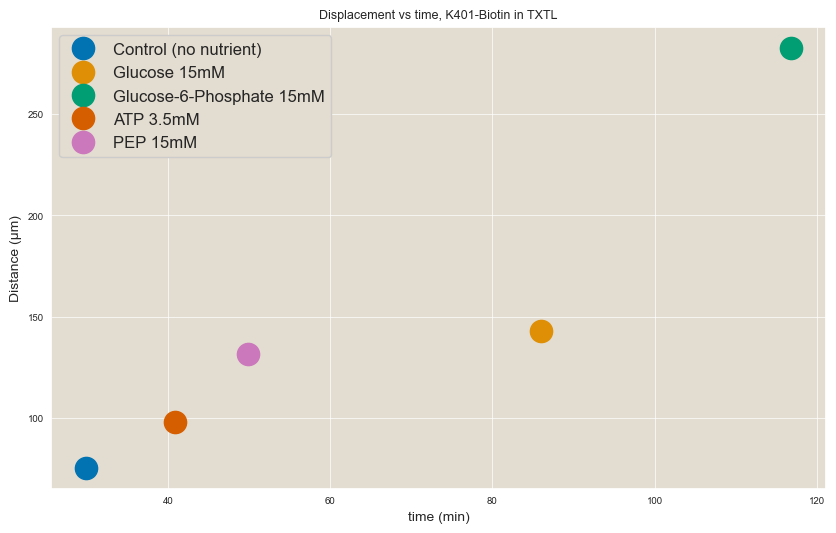

In [127]:
plot_distance([control_2, glucose_2, G6P_2, atp_2, PEP_2], ["Control (no nutrient)", "Glucose 15mM", "Glucose-6-Phosphate 15mM", "ATP 3.5mM", "PEP 15mM"])

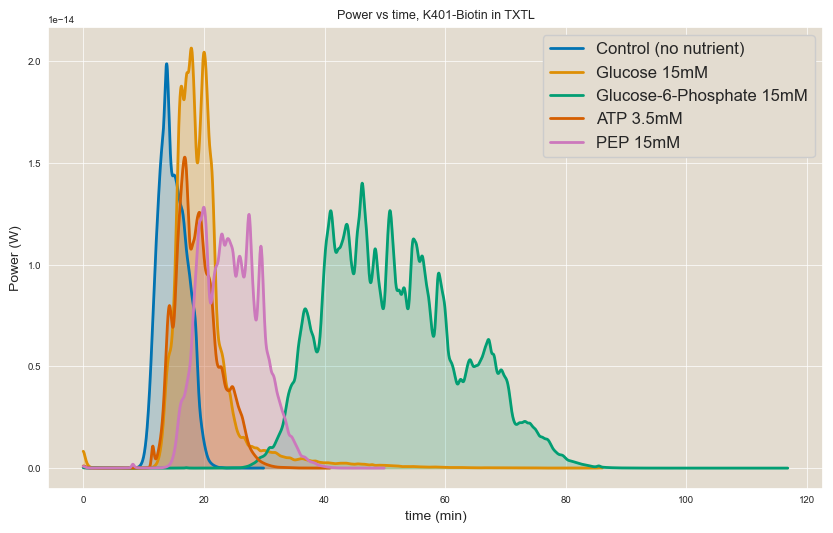

In [126]:
plot_power([control_2, glucose_2, G6P_2, atp_2, PEP_2], ["Control (no nutrient)", "Glucose 15mM", "Glucose-6-Phosphate 15mM", "ATP 3.5mM", "PEP 15mM"])

In [ ]:
# df.to_csv('../../data/K401bio_protein-PIV_velocity_control/K401bio_protein-PIV_velocity_control-vmax.csv')